# Task
analisa EDA data tersebut dan tentukan


📊 1️⃣ Volume Perdagangan Saham Terbesar Analisis:

Saham mana yang paling banyak diperdagangkan berdasarkan total volume?(top 10)

📈 2️⃣ Volatilitas Saham (Perbedaan Tertinggi & Terendah) Analisis:

Saham mana yang paling fluktuatif berdasarkan selisih harga tertinggi dan terendah?

📊 3️⃣ Aktivitas Investor Asing (Foreign Buy vs. Foreign Sell) Analisis:

Apakah investor asing lebih banyak membeli atau menjual saham tertentu?

## Data loading

### Subtask:
Load the data from the Excel file "Ringkasan Saham-20250327.xlsx" into a pandas DataFrame.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import gspread
from google.colab import auth
from google.auth import default

# Load Data from Google Sheets
def load_google_sheets_data():
    try:
        # Authenticate and initialize gspread
        auth.authenticate_user()
        creds, _ = default()
        gc = gspread.authorize(creds)

        # Open the Google Sheet using its URL
        sheet_url = "https://docs.google.com/spreadsheets/d/19gnvU8SjwLOgndSXWpB05maGo7FoSjNo/edit?gid=1482532782#gid=1482532782"
        sh = gc.open_by_url(sheet_url)
        worksheet = sh.sheet1  # Access first sheet

        # Convert the worksheet into a DataFrame
        data = worksheet.get_all_records()
        df = pd.DataFrame(data)

        return df
    except Exception as e:
        print(f"Error loading Google Sheets: {e}")
        return None

# Load Data from Excel File
def load_excel_data(file_path):
    try:
        # Load the Excel file
        df = pd.read_excel(file_path)
        display(df.head())

        # Define relevant columns
        relevant_columns = ['Nama Perusahaan', 'Volume', 'Tertinggi', 'Terendah', 'Foreign Buy', 'Foreign Sell']

        # Check for missing columns
        missing_cols = set(relevant_columns) - set(df.columns)
        if missing_cols:
            print(f"Warning: The following columns are missing: {missing_cols}")

        # Rename columns if they exist
        new_column_names = {
            'Nama Perusahaan': 'stock_name',
            'Volume': 'volume',
            'Tertinggi': 'high_price',
            'Terendah': 'low_price',
            'Foreign Buy': 'foreign_buy',
            'Foreign Sell': 'foreign_sell'
        }
        df = df.rename(columns={old: new for old, new in new_column_names.items() if old in df.columns})

        # Print DataFrame info
        print("Dataset Shape:", df.shape)
        print("Missing Values:")
        print(df.isnull().sum())

        return df

    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

    return None

# Choose data source: "google_sheets" or "excel"
data_source = "excel"  # Change to "google_sheets" if using Google Sheets

if data_source == "google_sheets":
    df = load_google_sheets_data()
else:
    file_path = "/content/drive/MyDrive/Dataset /abc.xlsl"  # Sesuaikan path
    df = load_excel_data(file_path)

# Check if DataFrame is loaded
if df is not None:
    display(df.head())
else:
    print("Data loading failed.")


,No,Kode Saham,Nama Perusahaan,Remarks,Sebelumnya,Open Price,Tanggal Perdagangan Terakhir,First Trade,Tertinggi,Terendah,...,Bid,Bid Volume,Listed Shares,Tradeble Shares,Weight For Index,Foreign Sell,Foreign Buy,Non Regular Volume,Non Regular Value,Non Regular Frequency
0,1,AADI,Adaro Andalan Indonesia Tbk.,--UO1130000000A121------------,6575,6575,27 Mar 2025,6575,6600,6500,...,6525,15600,7786891760,7786891760,778689176,712000,704100,141,917425,2
1,2,AALI,Astra Agro Lestari Tbk.,--MO113E000200D232------------,5675,5675,27 Mar 2025,5675,5675,5575,...,5600,79700,1924688333,1924688333,390711732,12300,22200,0,0,0
2,3,ABBA,Mahaka Media Tbk.,--U-4100000000E614-E---------X,16,0,27 Mar 2025,0,17,16,...,17,868600,3935892857,3935892857,1298844643,0,0,0,0,0
3,4,ABDA,Asuransi Bina Dana Arta Tbk.,--U-4105000000G412-----------X,3400,0,27 Mar 2025,0,0,0,...,3060,100,620806680,620806680,81325675,0,0,0,0,0
4,5,ABMM,ABM Investama Tbk.,--MO1105000000A121------------,3060,3070,27 Mar 2025,3070,3090,3040,...,3050,63800,2753165000,2753165000,419031713,27100,163200,0,0,0


Dataset Shape: (958, 28)
Missing Values:
No                              0
Kode Saham                      0
stock_name                      0
Remarks                         0
Sebelumnya                      0
Open Price                      0
Tanggal Perdagangan Terakhir    0
First Trade                     0
high_price                      0
low_price                       0
Penutupan                       0
Selisih                         0
volume                          0
Nilai                           0
Frekuensi                       0
Index Individual                0
Offer                           0
Offer Volume                    0
Bid                             0
Bid Volume                      0
Listed Shares                   0
Tradeble Shares                 0
Weight For Index                0
foreign_sell                    0
foreign_buy                     0
Non Regular Volume              0
Non Regular Value               0
Non Regular Frequency           0
dtype: 

,No,Kode Saham,stock_name,Remarks,Sebelumnya,Open Price,Tanggal Perdagangan Terakhir,First Trade,high_price,low_price,...,Bid,Bid Volume,Listed Shares,Tradeble Shares,Weight For Index,foreign_sell,foreign_buy,Non Regular Volume,Non Regular Value,Non Regular Frequency
0,1,AADI,Adaro Andalan Indonesia Tbk.,--UO1130000000A121------------,6575,6575,27 Mar 2025,6575,6600,6500,...,6525,15600,7786891760,7786891760,778689176,712000,704100,141,917425,2
1,2,AALI,Astra Agro Lestari Tbk.,--MO113E000200D232------------,5675,5675,27 Mar 2025,5675,5675,5575,...,5600,79700,1924688333,1924688333,390711732,12300,22200,0,0,0
2,3,ABBA,Mahaka Media Tbk.,--U-4100000000E614-E---------X,16,0,27 Mar 2025,0,17,16,...,17,868600,3935892857,3935892857,1298844643,0,0,0,0,0
3,4,ABDA,Asuransi Bina Dana Arta Tbk.,--U-4105000000G412-----------X,3400,0,27 Mar 2025,0,0,0,...,3060,100,620806680,620806680,81325675,0,0,0,0,0
4,5,ABMM,ABM Investama Tbk.,--MO1105000000A121------------,3060,3070,27 Mar 2025,3070,3090,3040,...,3050,63800,2753165000,2753165000,419031713,27100,163200,0,0,0


## Data exploration

### Subtask:
Explore the loaded data to understand its structure, identify potential issues, and prepare for subsequent data wrangling and analysis.


**Reasoning**:
Examine the data structure, check data types, identify missing values, explore descriptive statistics, and perform preliminary outlier detection as instructed.



In [ ]:
# Display the first and last few rows of the DataFrame
display(df.head())
display(df.tail())

# Display the shape of the DataFrame
print(f"DataFrame Shape: {df.shape}")

# Get a summary of the DataFrame
print(df.info())

# Check data types of key columns
key_columns = ['stock_name', 'volume', 'high_price', 'low_price', 'foreign_buy', 'foreign_sell']
print("\nData Types of Key Columns:")
print(df[key_columns].dtypes)

# Identify missing values
print("\nMissing Values:")
print(df[key_columns].isnull().sum())

# Explore descriptive statistics
print("\nDescriptive Statistics:")
print(df[['volume', 'high_price', 'low_price', 'foreign_buy', 'foreign_sell']].describe())

,No,Kode Saham,stock_name,Remarks,Sebelumnya,Open Price,Tanggal Perdagangan Terakhir,First Trade,high_price,low_price,...,Bid,Bid Volume,Listed Shares,Tradeble Shares,Weight For Index,foreign_sell,foreign_buy,Non Regular Volume,Non Regular Value,Non Regular Frequency
0,1,AADI,Adaro Andalan Indonesia Tbk.,--UO1130000000A121------------,6575,6575,27 Mar 2025,6575,6600,6500,...,6525,15600,7786891760,7786891760,778689176,712000,704100,141,917425,2
1,2,AALI,Astra Agro Lestari Tbk.,--MO113E000200D232------------,5675,5675,27 Mar 2025,5675,5675,5575,...,5600,79700,1924688333,1924688333,390711732,12300,22200,0,0,0
2,3,ABBA,Mahaka Media Tbk.,--U-4100000000E614-E---------X,16,0,27 Mar 2025,0,17,16,...,17,868600,3935892857,3935892857,1298844643,0,0,0,0,0
3,4,ABDA,Asuransi Bina Dana Arta Tbk.,--U-4105000000G412-----------X,3400,0,27 Mar 2025,0,0,0,...,3060,100,620806680,620806680,81325675,0,0,0,0,0
4,5,ABMM,ABM Investama Tbk.,--MO1105000000A121------------,3060,3070,27 Mar 2025,3070,3090,3040,...,3050,63800,2753165000,2753165000,419031713,27100,163200,0,0,0


,No,Kode Saham,stock_name,Remarks,Sebelumnya,Open Price,Tanggal Perdagangan Terakhir,First Trade,high_price,low_price,...,Bid,Bid Volume,Listed Shares,Tradeble Shares,Weight For Index,foreign_sell,foreign_buy,Non Regular Volume,Non Regular Value,Non Regular Frequency
953,954,ZATA,Bersama Zatta Jaya Tbk.,--U-4130000000E741-----------X,8,0,27 Mar 2025,0,9,8,...,8,5526300,8496000000,1700000000,2046686400,0,0,0,0,0
954,955,ZBRA,Dosni Roha Indonesia Tbk.,--UO2130000000C311M-----------,50,50,27 Mar 2025,50,50,50,...,0,0,2510706263,2510706263,454437834,0,0,0,0,0
955,956,ZINC,Kapuas Prima Coal Tbk.,--U-4100000000B146-----------X,14,0,27 Mar 2025,0,14,13,...,13,6928400,25250000000,25250000000,8733975000,0,0,0,0,0
956,957,ZONE,Mega Perintis Tbk.,--UO2130000000E741------------,800,0,27 Mar 2025,0,800,800,...,795,300,870171478,870171478,132527116,0,0,0,0,0
957,958,ZYRX,Zyrexindo Mandiri Buana Tbk.,--UO2130000000I221------------,120,0,27 Mar 2025,0,122,118,...,117,200,1333334556,1333334556,268933580,0,0,0,0,0


DataFrame Shape: (958, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   No                            958 non-null    int64  
 1   Kode Saham                    958 non-null    object 
 2   stock_name                    958 non-null    object 
 3   Remarks                       958 non-null    object 
 4   Sebelumnya                    958 non-null    int64  
 5   Open Price                    958 non-null    int64  
 6   Tanggal Perdagangan Terakhir  958 non-null    object 
 7   First Trade                   958 non-null    int64  
 8   high_price                    958 non-null    int64  
 9   low_price                     958 non-null    int64  
 10  Penutupan                     958 non-null    int64  
 11  Selisih                       958 non-null    int64  
 12  volume                        958 non

## Data wrangling

### Subtask:
Calculate volatility and net foreign activity for each stock.


**Reasoning**:
Calculate the volatility and net foreign activity for each stock and store them in new columns.



In [ ]:
# Calculate volatility
df['volatility'] = df['high_price'] - df['low_price']

# Calculate net foreign activity
df['net_foreign_activity'] = df['foreign_buy'] - df['foreign_sell']

# Display the updated DataFrame to verify the new columns
display(df.head())

,No,Kode Saham,stock_name,Remarks,Sebelumnya,Open Price,Tanggal Perdagangan Terakhir,First Trade,high_price,low_price,...,Listed Shares,Tradeble Shares,Weight For Index,foreign_sell,foreign_buy,Non Regular Volume,Non Regular Value,Non Regular Frequency,volatility,net_foreign_activity
0,1,AADI,Adaro Andalan Indonesia Tbk.,--UO1130000000A121------------,6575,6575,27 Mar 2025,6575,6600,6500,...,7786891760,7786891760,778689176,712000,704100,141,917425,2,100,-7900
1,2,AALI,Astra Agro Lestari Tbk.,--MO113E000200D232------------,5675,5675,27 Mar 2025,5675,5675,5575,...,1924688333,1924688333,390711732,12300,22200,0,0,0,100,9900
2,3,ABBA,Mahaka Media Tbk.,--U-4100000000E614-E---------X,16,0,27 Mar 2025,0,17,16,...,3935892857,3935892857,1298844643,0,0,0,0,0,1,0
3,4,ABDA,Asuransi Bina Dana Arta Tbk.,--U-4105000000G412-----------X,3400,0,27 Mar 2025,0,0,0,...,620806680,620806680,81325675,0,0,0,0,0,0,0
4,5,ABMM,ABM Investama Tbk.,--MO1105000000A121------------,3060,3070,27 Mar 2025,3070,3090,3040,...,2753165000,2753165000,419031713,27100,163200,0,0,0,50,136100


## Data analysis

### Subtask:
Analyze the data to identify the top 10 stocks by trading volume, the most volatile stocks, and the net foreign investment trends.


**Reasoning**:
Identify the top 10 stocks by volume, most volatile stocks, and net foreign investment trends.



In [ ]:
# Top 10 Stocks by Volume
top_10_volume = df.sort_values(by='volume', ascending=False).head(10)
display(top_10_volume)

# Most Volatile Stocks
most_volatile = df.sort_values(by='volatility', ascending=False)
display(most_volatile.head(10))

# Net Foreign Investment Trends
# Summary statistics
print(df['net_foreign_activity'].describe())

# Group by the sign of net foreign activity
net_foreign_activity_grouped = df.groupby(df['net_foreign_activity'].apply(lambda x: 'Positive' if x > 0 else 'Negative'))
print(net_foreign_activity_grouped['stock_name'].count())

# You can further analyze this grouped data

,No,Kode Saham,stock_name,Remarks,Sebelumnya,Open Price,Tanggal Perdagangan Terakhir,First Trade,high_price,low_price,...,Listed Shares,Tradeble Shares,Weight For Index,foreign_sell,foreign_buy,Non Regular Volume,Non Regular Value,Non Regular Frequency,volatility,net_foreign_activity
343,344,GOTO,GoTo Gojek Tokopedia Tbk.,--UO5H40544000I111----------K-,83,82,27 Mar 2025,82,83,81,...,1140573267220,1140573267220,885997313976,776292700,713309500,27251233,1752695655,11,2,-62983200
182,183,BUKA,Bukalapak.com Tbk.,--UO5105001000I111----------I-,143,143,27 Mar 2025,143,147,138,...,103121636167,103121636167,54871022604,244239200,51401100,18,2574,1,9,-192838100
185,186,BUMI,Bumi Resources Tbk.,--UO1135000000A121------------,90,91,27 Mar 2025,91,96,90,...,371335392068,371335392068,102562835289,31779800,170190700,0,0,0,6,138410900
101,102,BBRI,Bank Rakyat Indonesia (Persero) Tbk.,--SO1UQSPNU100G111------------,4000,4000,27 Mar 2025,3990,4050,3930,...,150043411587,150043411587,62029728776,164166900,249719600,1392090,5566074998,12,120,85552700
145,146,BMRI,Bank Mandiri (Persero) Tbk.,--SO1UQSPNU100G111------------,5150,5150,27 Mar 2025,5175,5250,5050,...,92399999996,92399999996,36072959998,194625400,216993300,13021622,67803085240,24,200,22367900
804,805,SMIL,Sarana Mitra Luas Tbk.,--UO1835400000C141------------,370,372,27 Mar 2025,372,426,360,...,8750178765,8750178765,1750034064,43406100,41419600,27000000,9990000000,1,66,-1986500
136,137,BKSL,Sentul City Tbk.,--UO1135000000H111------------,67,67,27 Mar 2025,68,75,67,...,167708902705,167708902705,16435472465,32865800,10826100,0,0,0,8,-22039700
10,11,ADHI,Adhi Karya (Persero) Tbk.,--MO1135750000J211------------,226,230,27 Mar 2025,230,274,230,...,8407608979,8407608979,2998153362,3459100,1353600,0,0,0,44,-2105500
184,185,BULL,Buana Lintas Lautan Tbk.,--UO2135000000A112------------,122,122,27 Mar 2025,122,123,117,...,14117801449,14117801449,9336102098,16154000,52914100,0,0,0,6,36760100
724,725,PTPP,PP (Persero) Tbk.,--MO183MK51000J211------------,290,306,27 Mar 2025,306,342,298,...,6199897354,6199897354,2934411418,28882600,6949600,0,0,0,44,-21933000


,No,Kode Saham,stock_name,Remarks,Sebelumnya,Open Price,Tanggal Perdagangan Terakhir,First Trade,high_price,low_price,...,Listed Shares,Tradeble Shares,Weight For Index,foreign_sell,foreign_buy,Non Regular Volume,Non Regular Value,Non Regular Frequency,volatility,net_foreign_activity
246,247,DCII,DCI Indonesia Tbk.,--UO2130000000I121------------,167500,0,27 Mar 2025,0,168550,162000,...,2383745900,2383745900,533005583,500,200,0,0,0,6550,-300
664,665,PANI,Pantai Indah Kapuk Dua Tbk.,--UO2K30F00100H111------------,9100,9300,27 Mar 2025,9350,10850,9200,...,16883595500,16883595500,1701866426,6621200,2697700,0,0,0,1650,-3923500
589,590,MLPT,Multipolar Technology Tbk.,--UO2135000000I121------------,41000,0,27 Mar 2025,0,41750,40200,...,1875000000,1875000000,143062500,3600,0,0,0,0,1550,-3600
512,513,LIFE,MSIG Life Insurance Indonesia Tbk.,--UO2105000000G413------------,5725,0,27 Mar 2025,0,6850,5675,...,2100000000,2100000000,157500000,200,100,10650000,60438750000,1,1175,-100
274,275,DSSA,Dian Swastatika Sentosa Tbk,--UO1134000000A121------------,42600,0,27 Mar 2025,0,43025,42300,...,7705523200,7705523200,1573467837,222100,208300,0,0,0,725,-13800
912,913,UNTR,United Tractors Tbk.,--MO1XNGQ7H200C141------------,23500,23475,27 Mar 2025,23500,23725,23025,...,3730135136,3730135136,1311142500,2207500,2199000,32215,757042800,4,700,-8500
198,199,CBDK,Bangun Kosambi Sukses Tbk.,--UO1130000000H111------------,5075,5800,27 Mar 2025,5825,6075,5450,...,5668944500,3066894500,566894500,5746300,5609500,0,0,0,625,-136800
742,743,RATU,Raharja Energi Cepu Tbk.,--UO2100000000A111------------,4340,4340,27 Mar 2025,4350,4820,4200,...,2715053800,2715053800,543010800,1184200,1217300,0,0,0,620,33100
457,458,JSPT,Jakarta Setiabudi Internasional Tbk.,--UO2135000000E512------------,7150,7300,27 Mar 2025,7500,7500,6975,...,2318736000,2318736000,191295720,5700,100,0,0,0,525,-5600
836,837,STTP,Siantar Top Tbk.,--UO2135000000D222------------,11150,0,27 Mar 2025,0,11025,10500,...,1310000000,1310000000,524000000,0,0,0,0,0,525,0


count    9.580000e+02
mean     1.417462e+05
std      9.438668e+06
min     -1.928381e+08
25%     -1.000000e+03
50%      0.000000e+00
75%      0.000000e+00
max      1.384109e+08
Name: net_foreign_activity, dtype: float64
net_foreign_activity
Negative    743
Positive    215
Name: stock_name, dtype: int64


## Data visualization

### Subtask:
Create visualizations for the top 10 stocks by volume, stock volatility, and net foreign activity.


**Reasoning**:
Create visualizations for the top 10 stocks by volume, stock volatility, and net foreign activity, using matplotlib.



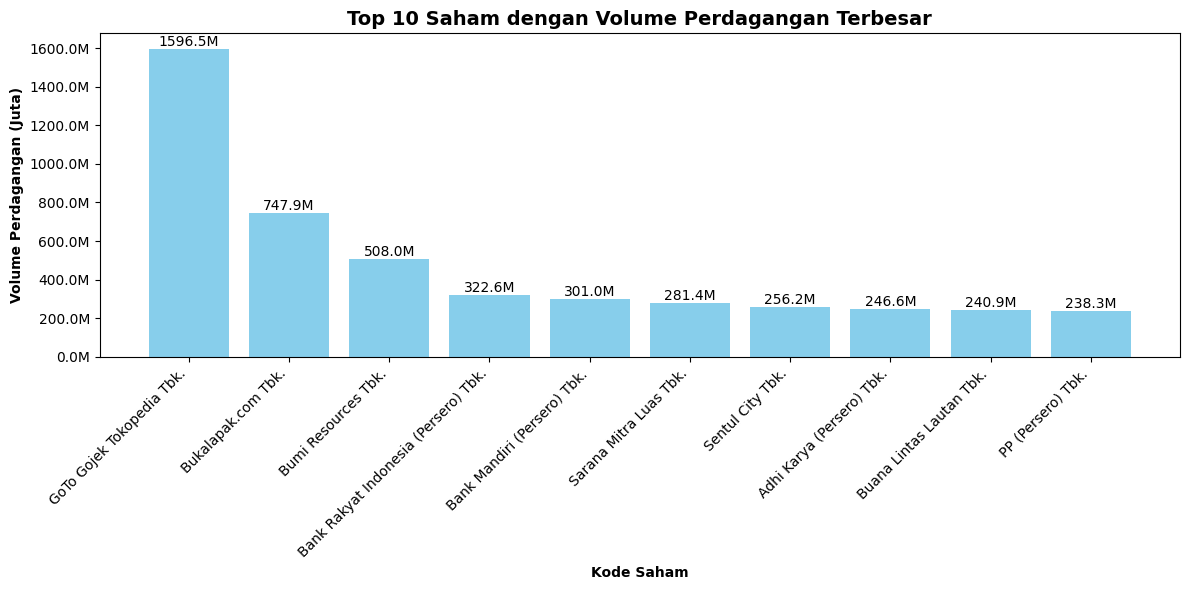

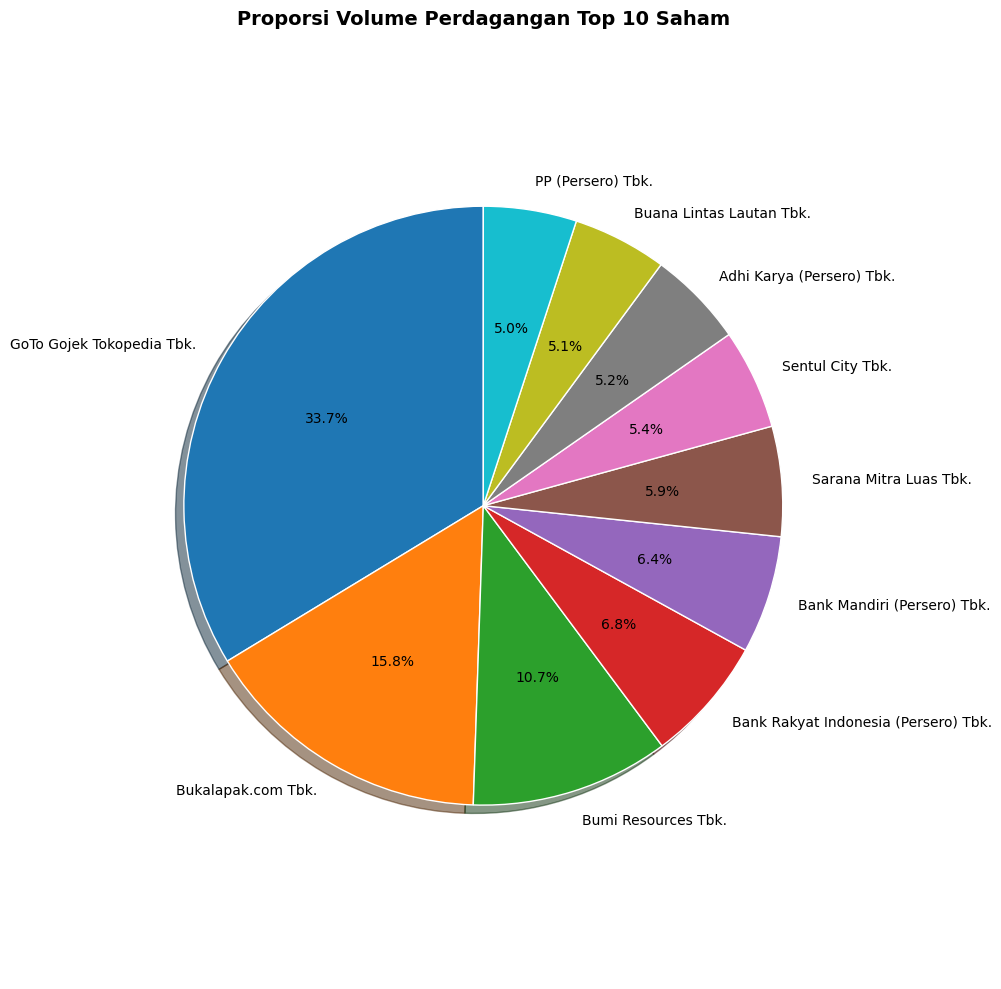

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# 1. ANALISIS VOLUME PERDAGANGAN SAHAM
# Membuat top 10 volume
top_10_volume = df.sort_values(by='volume', ascending=False).head(10)

# 1.1 Bar chart dengan format angka yang lebih mudah dibaca
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_volume['stock_name'], top_10_volume['volume'], color='skyblue')

# Format angka volume (dalam juta)
def millions_formatter(x, pos):
    return f'{x/1000000:.1f}M'

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Tambahkan nilai di atas setiap bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height/1000000:.1f}M',
            ha='center', va='bottom', rotation=0)

plt.xlabel('Kode Saham', fontweight='bold')
plt.ylabel('Volume Perdagangan (Juta)', fontweight='bold')
plt.title('Top 10 Saham dengan Volume Perdagangan Terbesar', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 1.2 Pie chart untuk proporsi volume perdagangan
plt.figure(figsize=(10, 10))
plt.pie(top_10_volume['volume'], labels=top_10_volume['stock_name'],
        autopct='%1.1f%%', startangle=90, shadow=True,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.axis('equal')
plt.title('Proporsi Volume Perdagangan Top 10 Saham', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


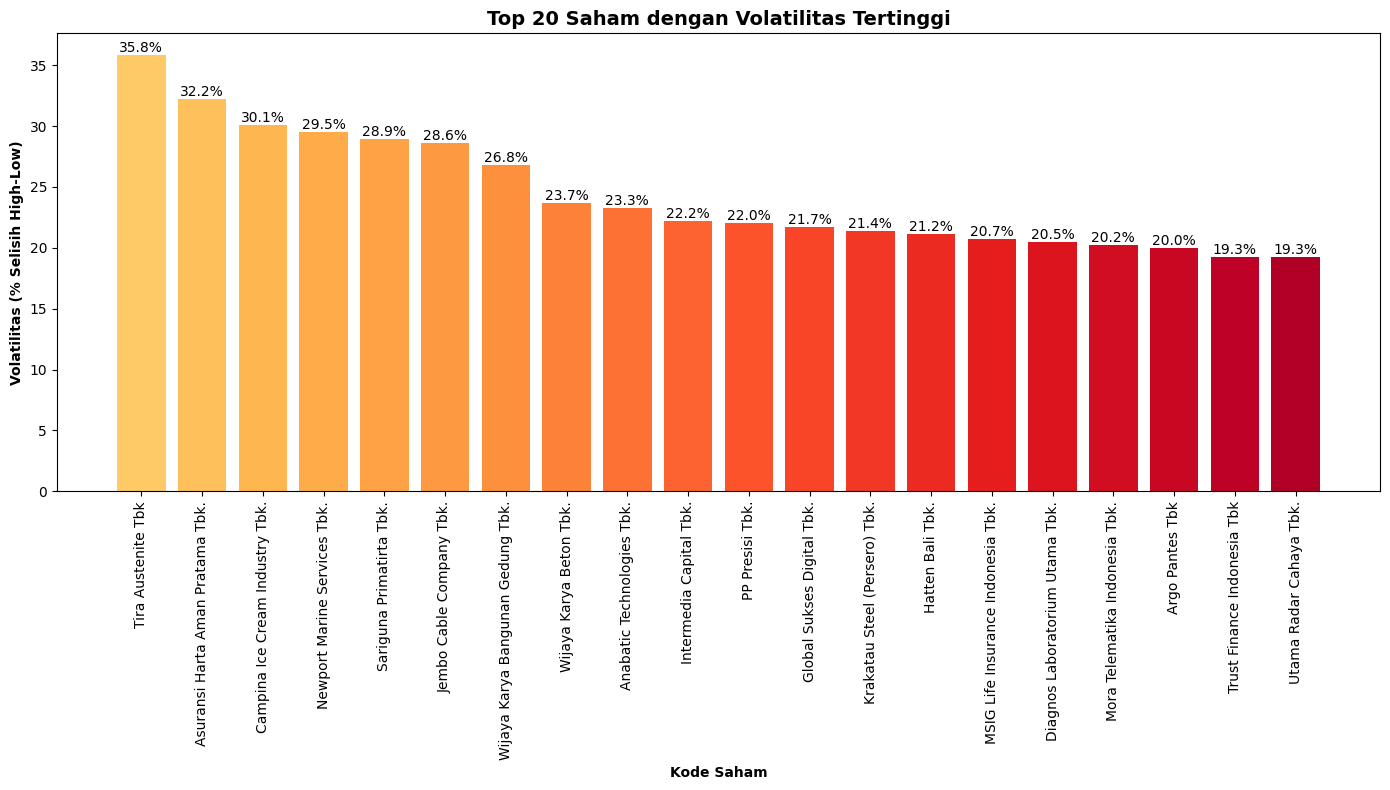

In [ ]:
# Hitung volatilitas (selisih harga tertinggi dan terendah)
df['volatility'] = df['high_price'] - df['low_price']
# Tambahkan volatilitas relatif (dalam persentase)
df['volatility_pct'] = (df['volatility'] / df['low_price']) * 100
most_volatile = df.sort_values(by='volatility_pct', ascending=False)

# 2.1 Bar chart volatilitas dengan warna gradien
plt.figure(figsize=(14, 8))
top_20_volatile = most_volatile.head(20)
colors = plt.cm.YlOrRd(np.linspace(0.3, 0.9, len(top_20_volatile)))

bars = plt.bar(top_20_volatile['stock_name'], top_20_volatile['volatility_pct'], color=colors)

# Tambahkan nilai di atas setiap bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%',
            ha='center', va='bottom', rotation=0)

plt.xlabel('Kode Saham', fontweight='bold')
plt.ylabel('Volatilitas (% Selisih High-Low)', fontweight='bold')
plt.title('Top 20 Saham dengan Volatilitas Tertinggi', fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



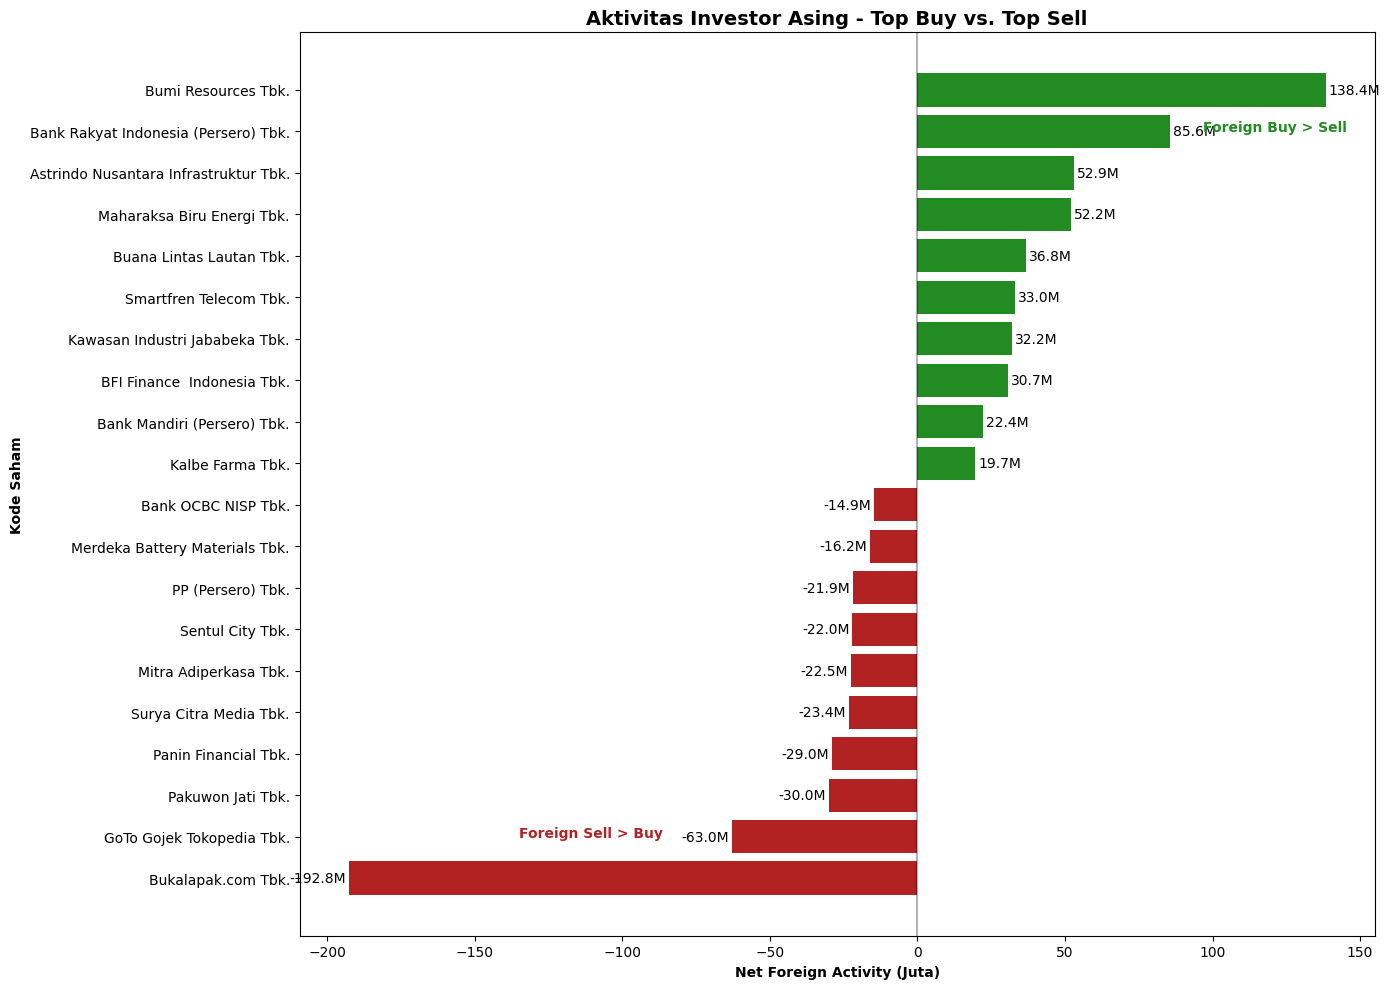

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter


# 3. ANALISIS AKTIVITAS INVESTOR ASING
# Hitung net foreign activity
df['net_foreign_activity'] = df['foreign_buy'] - df['foreign_sell']

# 3.1 Diverging bar chart yang ditingkatkan
# Urutkan data
df_sorted = df.sort_values(by='net_foreign_activity')

# Pilih top dan bottom saham berdasarkan aktivitas asing
top_buy = df_sorted.tail(10)  # Top 10 net buying
top_sell = df_sorted.head(10)   # Top 10 net selling
df_plot = pd.concat([top_sell, top_buy])

# Konversi ke jutaan untuk nilai yang lebih mudah dibaca
df_plot['net_foreign_activity_m'] = df_plot['net_foreign_activity'] / 1000000

plt.figure(figsize=(14, 10))
bars = plt.barh(df_plot['stock_name'], df_plot['net_foreign_activity_m'],
       color=['firebrick' if x < 0 else 'forestgreen' for x in df_plot['net_foreign_activity_m']])

# Tambahkan nilai pada setiap bar
for bar in bars:
    width = bar.get_width()
    if width < 0:
        ha = 'right'
        x = width - 1
    else:
        ha = 'left'
        x = width + 1
    plt.text(x, bar.get_y() + bar.get_height()/2,
            f'{width:.1f}M',
            ha=ha, va='center')

# Tambahkan garis vertikal di 0
plt.axvline(0, color='black', linestyle='-', alpha=0.3)

# Label dan judul
plt.xlabel('Net Foreign Activity (Juta)', fontweight='bold')
plt.ylabel('Kode Saham', fontweight='bold')
plt.title('Aktivitas Investor Asing - Top Buy vs. Top Sell', fontsize=14, fontweight='bold')

# Tambahkan keterangan
plt.text(max(df_plot['net_foreign_activity_m'])*0.7, len(df_plot)-2, 'Foreign Buy > Sell',
        color='forestgreen', fontweight='bold')
plt.text(min(df_plot['net_foreign_activity_m'])*0.7, 1, 'Foreign Sell > Buy',
        color='firebrick', fontweight='bold')

plt.tight_layout()
plt.show()


#📊 Analisis Perdagangan Saham

##1️⃣ Volume Perdagangan Saham Terbesar (Top 10)

###Daftar Top 10:

    GoTo Gojek Tokopedia Tbk – 1,596.5M

    Bukalapak.com Tbk – 747.9M

    Bumi Resources Tbk – 508.0M

    Bank Rakyat Indonesia (Persero) Tbk – 322.6M

    Bank Mandiri (Persero) Tbk – 301.0M

    Sarana Mitra Luas Tbk – 281.4M

    Sentul City Tbk – 256.2M

    Adhi Karya (Persero) Tbk – 246.6M

    Buana Lintas Lautan Tbk – 240.9M

    PP (Persero) Tbk – 238.3M

Analisis:

    🚀 Dominasi Teknologi & Digital:
    GoTo dan Bukalapak menunjukkan volume yang sangat tinggi. GoTo menguasai lebih dari dua kali volume pesaing terdekatnya.

    🏦 Sektor Perbankan & BUMN:
    Masuknya BRI dan Mandiri serta saham-saham BUMN lainnya (Adhi Karya, PP) menunjukkan peran aktif emiten pemerintah.

    ⛏️ Sektor Sumber Daya Alam & Lainnya:
    Bumi Resources dari sektor pertambangan serta saham properti (Sentul City) dan transportasi/logistik (Buana Lintas Lautan) juga mendapat perhatian.

    📉 Konsentrasi Likuiditas:
    Terdapat kesenjangan signifikan antara tiga teratas dengan sisanya, mengindikasikan konsentrasi likuiditas pada beberapa saham.

##2️⃣ Volatilitas Saham (Perbedaan Tertinggi & Terendah)

Saham Paling Fluktuatif:

    ⭐ Tira Austenite Tbk – 35.8%

Kelompok Volatilitas Sangat Tinggi (>30%):

    Tira Austenite Tbk – 35.8%

    Asuransi Harta Aman Pratama Tbk – 32.2%

    Campina Ice Cream Industry Tbk – 30.1%

Kelompok Volatilitas Tinggi (25–30%):

    Newport Marine Services Tbk – 29.5%

    Sariputra Primatra Tbk – 28.9%

    Jembo Cable Company Tbk – 28.6%

    Wijaya Karya Bangunan Gedung Tbk – 26.8%

Observasi:

    Sebagian besar saham (13 dari 20) memiliki volatilitas antara 19–23%, termasuk beberapa emiten BUMN seperti PP (Persero) dan Krakatau Steel (Persero).

    Untuk trader jangka pendek, Tira Austenite Tbk menawarkan potensi pergerakan harga yang signifikan.

    Investor yang lebih memilih risiko rendah dapat mempertimbangkan saham dengan volatilitas lebih rendah, meski tetap relatif tinggi di pasar ini.

##3️⃣ Aktivitas Investor Asing (Foreign Buy vs. Foreign Sell)

Pembelian (Net Buy):

    Investor asing cenderung membeli saham di sektor:

        Sumber Daya Alam (misalnya, Bumi Resources)

        Perbankan (misalnya, BRI dan Mandiri)

        Infrastruktur (misalnya, Astrindo)

        Energi (misalnya, Maharaksa Biru Energi)

Penjualan (Net Sell):

    Sebaliknya, investor asing cenderung menjual saham di sektor:

        Teknologi/Digital dan E-commerce (misalnya, Bukalapak dan GoTo)

        Properti (misalnya, Pakuwon dan Sentul)

        Ritel (misalnya, Mitra Adiperkasa)

Data Spesifik:

    Bumi Resources: Net Buy tertinggi sebesar 138.4M

    Bukalapak: Net Sell tertinggi sebesar -122.8M

Kesimpulan:

    Terdapat pola rotasi sektor di mana investor asing beralih dari saham
    teknologi/digital ke sektor tradisional seperti perbankan, sumber daya alam, dan energi.